In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

# Solicitudes de productos
Se pueden ver los productos solicitados entre los clientes. Revisar si la columna Producto_Solicitado tiene un número finito de tipos (debería). Features a sacar: Hace cuantos meses pidió un producto el cliente, el tipo de productos pedidos. Revisar columna de sustento. Tal vez incluya algunas irregularidades.

In [2]:
# Reading dataset
df_solicitudes = pd.read_csv("../data/DATA_SOLICITUDES_F.csv")

In [3]:
df_solicitudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 6 columns):
MES                    5202 non-null int64
ID_CLIENTE             5202 non-null int64
Moneda                 5202 non-null object
RGO_Importe            5202 non-null int64
Producto_Solicitado    5202 non-null object
Sustento_Solicitud     5190 non-null object
dtypes: int64(3), object(3)
memory usage: 243.9+ KB


In [4]:
df_solicitudes.head().T

,0,1,2,3,4
MES,201707,201707,201707,201803,201707
ID_CLIENTE,36714,56149,8423,30778,98413
Moneda,DÓLARES,DÓLARES,DÓLARES,DÓLARES,SOLES
RGO_Importe,1,1,1,1,1
Producto_Solicitado,LÍNEA DE FINANCIAMIENTO DE IMPORTACIÓN,PRÉSTAMO PARA ADQUISICIÓN DE BIENES INMUEBLES,CARTA DE CRÉDITO DE IMPORTACIÓN,LÍNEA MÚLTIPLE PARA OPERACIONES DE CORTO PLAZO,LÍNEA PARA EMISIÓN DE CARTAS FIANZA (TÉCNICAS ...
Sustento_Solicitud,#N.- SE TRATA DE OTORGAR UNA LÍNEA DE CARTAS F...,La propuesta contempla el financiamiento de # ...,Emision Carta de Credito para Importación de m...,Se propone renovar las líneas de descuento de ...,Se propone renovación e incremento de linea de...


In [6]:
df_solicitudes.shape #pocas

(5202, 6)

In [25]:
df_solicitudes.describe().T

,count,mean,std,min,25%,50%,75%,max
MES,5202.0,201749.143406,47.019976,201707.0,201707.00,201712.0,201804.0,201808.0
ID_CLIENTE,5202.0,50371.305652,28877.795126,37.0,26025.75,50113.0,75164.0,99966.0
RGO_Importe,5202.0,10.496540,5.768435,1.0,5.00,10.0,15.0,20.0


## Distribucion por MES

In [7]:
df_solicitudes['MES'].value_counts(dropna=False).sort_index()

201707    1508
201710     511
201711     503
201712     483
201801     439
201803     443
201804     402
201805     577
201808     336
Name: MES, dtype: int64

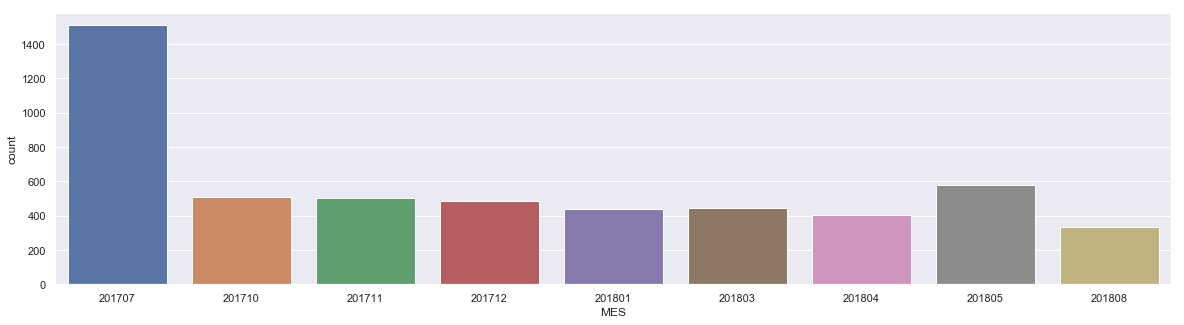

In [9]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'MES', data = df_solicitudes) 
# 201707 con gran número de solicitudes (Suceso importante? Oferta?)

## Distribucion por moneda

In [10]:
df_solicitudes['Moneda'].value_counts(dropna=False).sort_index() # Sera indistinto?

DÓLARES    1294
SOLES      3908
Name: Moneda, dtype: int64

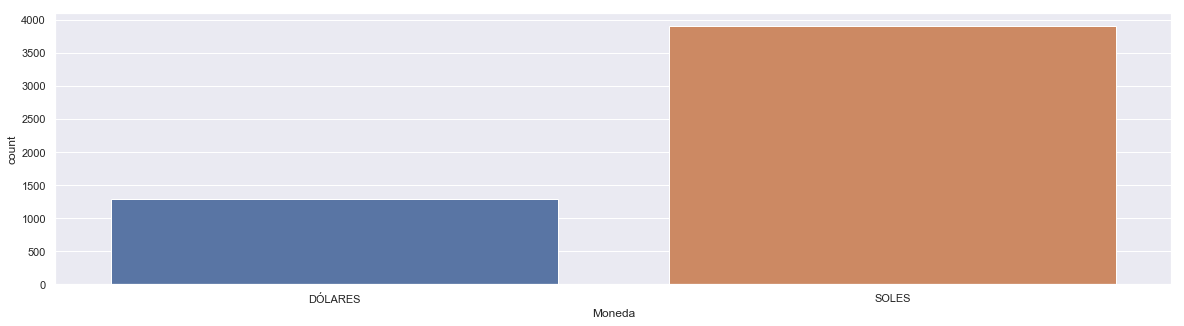

In [11]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'Moneda', data = df_solicitudes)

## Distribucion por rango de importe

In [12]:
df_solicitudes['RGO_Importe'].value_counts(dropna=False).sort_index() # ?????? Que es esto xd, es uniformisimo

1     261
2     261
3     260
4     260
5     260
6     260
7     260
8     260
9     260
10    260
11    260
12    260
13    260
14    260
15    260
16    260
17    260
18    260
19    260
20    260
Name: RGO_Importe, dtype: int64

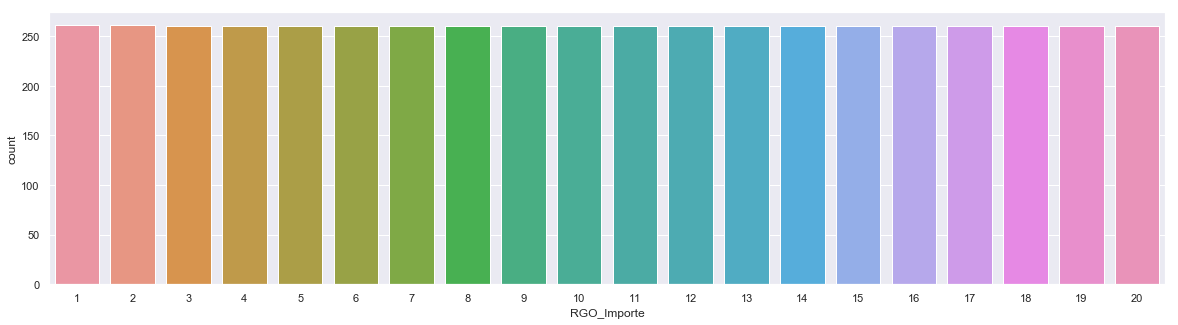

In [13]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes)

## Explorando productos solicitados

In [17]:
df_solicitudes['Producto_Solicitado'].value_counts(dropna=False).sort_values(ascending=False)

CARTA FIANZA TÉCNICA                                                                 1074
LÍNEA DE PRÉSTAMO CAPITAL DE TRABAJO                                                  791
PRÉSTAMO CAPITAL DE TRABAJO                                                           679
LÍNEA DE TARJETA CAPITAL DE TRABAJO                                                   612
LEASING MOBILIARIO                                                                    299
CARTA FIANZA ECONÓMICA                                                                205
PRÓRROGA DE CARTA FIANZA TÉCNICA                                                      189
PRÉSTAMO PARA ADQUISICIÓN DE BIENES INMUEBLES                                         164
LÍNEA DE FINANCIAMIENTO DE IMPORTACIÓN                                                 93
LÍNEA PARA EMISIÓN DE CARTAS FIANZA (TÉCNICAS Y ECONÓMICAS)                            84
PRÉSTAMO PARA ADQUISICIÓN DE BIENES MUEBLES                                            74
PRÉSTAMO P

## Rango de distribución de rango en productos más solicitados

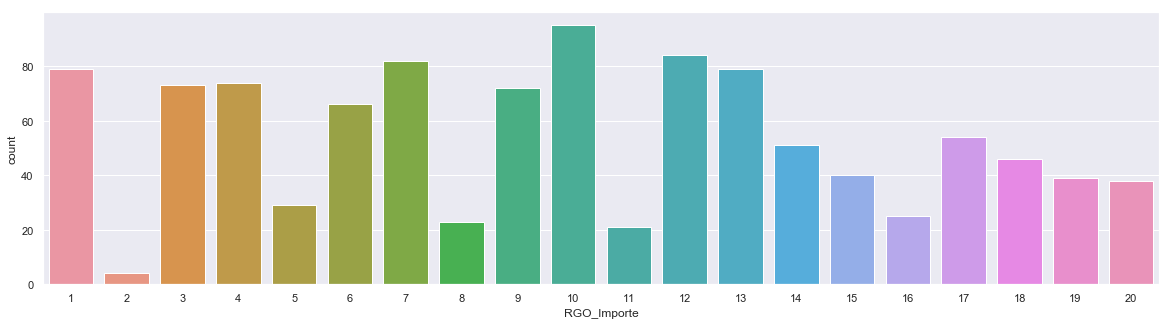

In [18]:
# CARTA FIANZA TÉCNICA
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['Producto_Solicitado'] == 'CARTA FIANZA TÉCNICA'])

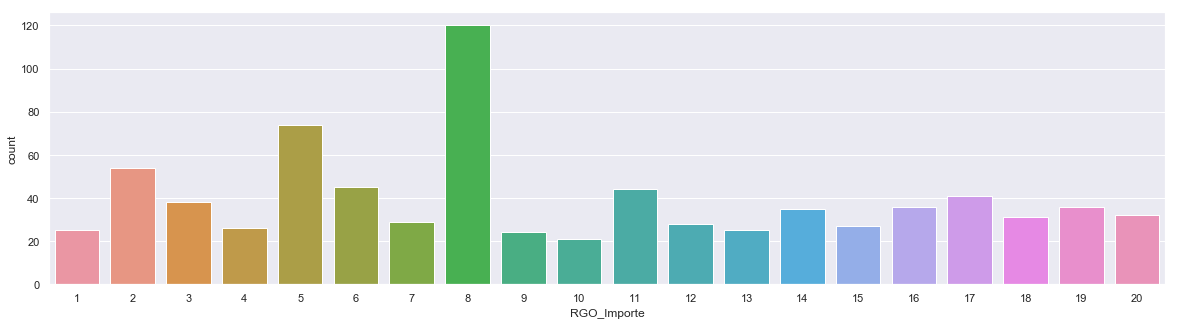

In [19]:
# LÍNEA DE PRÉSTAMO CAPITAL DE TRABAJO
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['Producto_Solicitado'] == 'LÍNEA DE PRÉSTAMO CAPITAL DE TRABAJO'])

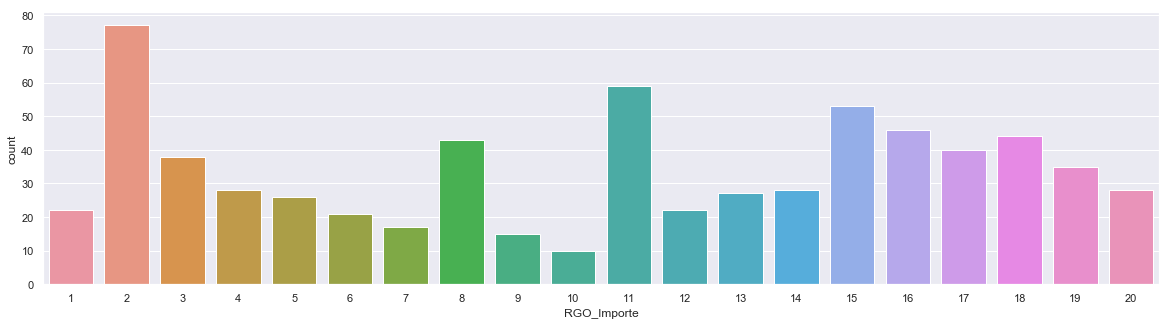

In [20]:
# PRÉSTAMO CAPITAL DE TRABAJO
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['Producto_Solicitado'] == 'PRÉSTAMO CAPITAL DE TRABAJO'])

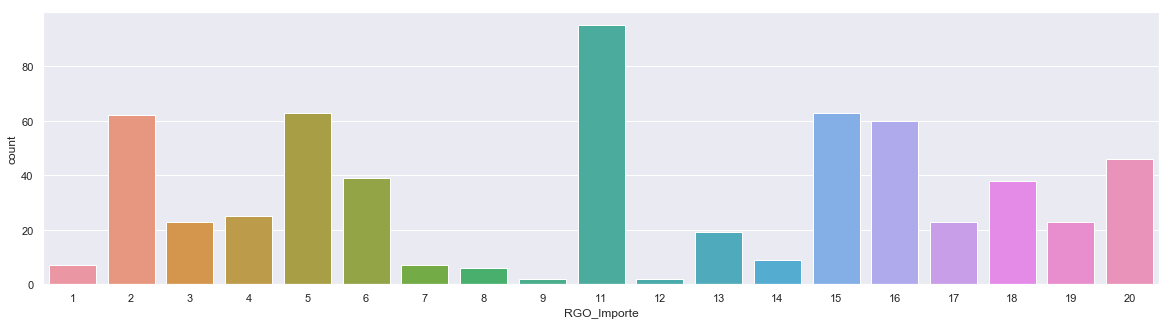

In [21]:
# LÍNEA DE TARJETA CAPITAL DE TRABAJO
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['Producto_Solicitado'] == 'LÍNEA DE TARJETA CAPITAL DE TRABAJO'])

## Rango de distribución de rango por años más frecuentes

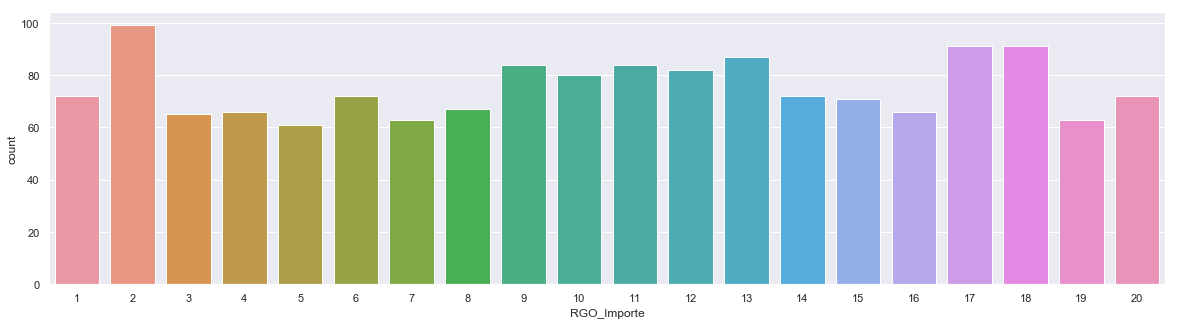

In [23]:
# 201707
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['MES'] == 201707])

In [26]:
df_solicitudes[df_solicitudes['MES'] == 201707]['RGO_Importe'].mean()

10.602785145888594

In [27]:
df_solicitudes[df_solicitudes['MES'] == 201707]['RGO_Importe'].std()

5.752070012115469

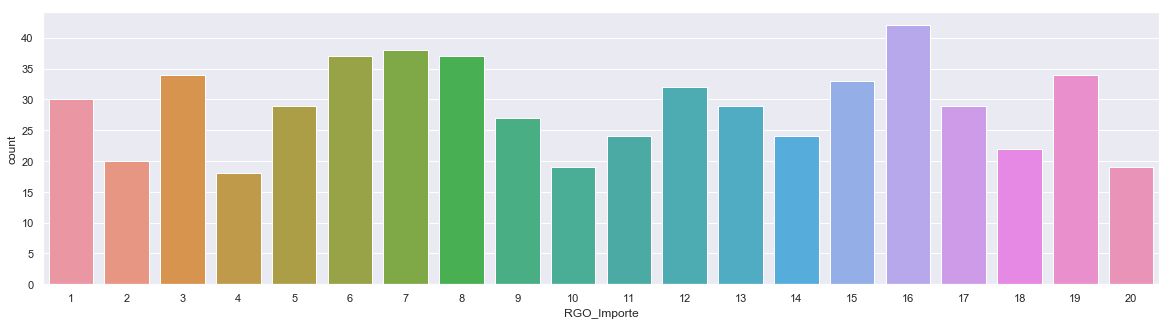

In [24]:
# 201805
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_Importe', data = df_solicitudes[df_solicitudes['MES'] == 201805])

In [28]:
df_solicitudes[df_solicitudes['MES'] == 201805]['RGO_Importe'].mean()

10.483535528596187

In [29]:
df_solicitudes[df_solicitudes['MES'] == 201805]['RGO_Importe'].std()

5.642733402892071

## Granularidad
Deberia haber mucho mas de un producto por mes pedido para algunos clientes.

In [31]:
df_solicitudes.sort_values(["ID_CLIENTE","MES"], inplace = True)
bool_series = df_solicitudes[["ID_CLIENTE","MES"]].duplicated()
df_solicitudes[bool_series] 

,MES,ID_CLIENTE,Moneda,RGO_Importe,Producto_Solicitado,Sustento_Solicitud
2738,201707,92,SOLES,11,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQU...
2753,201711,250,SOLES,11,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N) Se propone la subrogación de la deuda que ...
4487,201711,250,SOLES,18,SUBROGACIÓN DE ADQUISICIÓN DE BIENES INMUEBLES,#N) Se propone la subrogación de la deuda que ...
2693,201711,532,SOLES,11,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N: SE PROPONE OTORGAR PCOM CAPITAL DE TRABAJO...
3102,201808,745,DÓLARES,12,LÍNEA DE FINANCIAMIENTO DE IMPORTACIÓN,AMPLIACIÓN Y RENOVACIÓN DE LIMITE COMEX DE IMP...
1016,201711,1009,SOLES,4,CARTA FIANZA TÉCNICA,EMISION DE CARTA FIANZA ANTE EL SERVICIO NACIO...
1619,201803,1009,SOLES,7,CARTA FIANZA TÉCNICA,#N - #N EMISION DE CARTA FIANZA ANTE SERVICIO...
4080,201805,1129,SOLES,16,PRÉSTAMO CAPITAL DE TRABAJO,"EMPRESA CON EXPERIENCIA EN EL RUBRO DE # AÑOS,..."
1214,201707,1405,SOLES,5,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N - FINANCIAMIENTO DE VENTAS MEDIANTE EL DESC...
2291,201707,1602,DÓLARES,9,FINANCIAMIENTO DE IMPORTACIÓN DIRECTA,# N Financiamiento de importación de producto...


### Buscando ejemplos especificos

In [32]:
df_solicitudes[(df_solicitudes['MES'] == 201707) & (df_solicitudes['ID_CLIENTE'] == 92)]

,MES,ID_CLIENTE,Moneda,RGO_Importe,Producto_Solicitado,Sustento_Solicitud
1864,201707,92,DÓLARES,8,LEASING MOBILIARIO,#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQU...
2738,201707,92,SOLES,11,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQU...


In [34]:
# Leyendo el sustento
df_solicitudes[(df_solicitudes['MES'] == 201707) & (df_solicitudes['ID_CLIENTE'] == 92)]['Sustento_Solicitud'].values[0]

'#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQUISICION DE CAMIONETA PICK UP - MARCA TOYOA HILUX - PROVEEDOR GRUPO AUTONORT:\r\r\nPRECIO DE VENTA : US$ ##,###- APORTE : ##% , FINANCIAMIENTO ##% .\r\r\n\r\r\nCLIENTE SE MOVILIZA CONSTANTEMENTE PARA ADMINISTRAR SUS ## LOCALES - RESTAURANTES , ASI COMO PARA COMPRA DE INSUMOS, CON LA COMPRA DE LA CAMIONETA LE PERMITIRA TENER MAYOR COMODIDAD.\r\r\n\r\r\n\r\r\n#N EMISION DE TARJETA CAPITAL DE TRABAJO, COMO PROACTIVIDAD COMERCIAL DE MANERA EXCEPCIONAL.'

In [35]:
# Revisando si este cliente hizo compra de otros productos en otros periodos.
df_solicitudes[(df_solicitudes['ID_CLIENTE'] == 92)] # No. (Tal vez se fue xd)

,MES,ID_CLIENTE,Moneda,RGO_Importe,Producto_Solicitado,Sustento_Solicitud
1864,201707,92,DÓLARES,8,LEASING MOBILIARIO,#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQU...
2738,201707,92,SOLES,11,LÍNEA DE TARJETA CAPITAL DE TRABAJO,#N SE TRATA DE ATENDER AL CLIENTE PARA LA ADQU...
